# Import

In [18]:
import numpy as np
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Library Bantuan
from tqdm import tqdm
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')


# Library Sendiri
from libraryBantuan.katla import Katla
from libraryBantuan.gameKatla import GameKatla
from libraryBantuan.tree import DecisionTree

# Konstanta
PATH_FILE_TEXT = "D:\\Rama Nitip\\python\\katla\\file text\\"

# Baca Data

In [2]:
daftar_kata = list(pd.read_csv(PATH_FILE_TEXT + 'lima huruf katla.csv', header=None)[0])
list_jawaban = random.choices(daftar_kata, k=20)
print(f"Banyak Kata : {len(daftar_kata)}")

Banyak Kata : 8314


# Ambil model

In [5]:

DT = DecisionTree(PATH_FILE_TEXT+"DT.dictionary")
jumlah_bertanya = {key:[0,[]] for key in range(1, 14)}


for jawaban in daftar_kata:
    DT.now = DT.root                    # reset now menjadi di root
    game = GameKatla(daftar_kata, jawaban)
    tanya = 0

    tebakan = "sarit"
    pola = game.evaluasi_tebakan(tebakan)
    tanya += 1

    while pola != "!!!!!":
        tebakan = DT.kata_berikutnya(pola)
        pola    = game.evaluasi_tebakan(tebakan)
        tanya  += 1 

    if tanya in jumlah_bertanya:
        jumlah_bertanya[tanya][0] = jumlah_bertanya[tanya][0] + 1
        jumlah_bertanya[tanya][1].append(jawaban)
    else:
        jumlah_bertanya[tanya] = [1, [jawaban]]

# Pakai kata yang peluang jadi jawaban saja

,tanya,banyaknya,daftar kata
0,1,1,[sarit]
1,2,197,"[abrip, adpis, afkir, afrit, aktip, albit, amb..."
2,3,2130,"[abdis, ablur, abnus, abras, abrin, absen, abs..."
3,4,3310,"[abadi, abaka, abate, abawi, abaya, abbas, abd..."
4,5,1620,"[abang, abdas, abrar, abuza, abyad, acawi, aci..."
5,6,623,"[acang, adzan, afian, ajing, ajuan, ajung, amp..."
6,7,265,"[ahang, ajian, amung, anyar, babar, babas, bab..."
7,8,103,"[agung, ajang, anian, baban, bahar, bapak, bay..."
8,9,38,"[anang, apung, bawak, bayan, bayar, cacar, gah..."
9,10,17,"[awang, babak, bazar, capar, lawak, lelas, mar..."


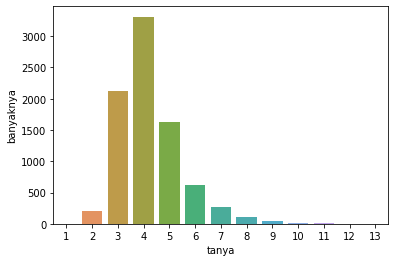

In [19]:
tanya = jumlah_bertanya.keys()
banyaknya = [i[0] for i in list(jumlah_bertanya.values())]
kata = [i[1] for i in list(jumlah_bertanya.values())]

df = pd.DataFrame({'tanya':tanya, 'banyaknya':banyaknya, 'daftar kata':kata}).sort_values(by='tanya')
display(df)

sns.barplot(x=df['tanya'], y=df['banyaknya']);

# Coba